<a href="https://colab.research.google.com/github/HilbertN/Tarea1/blob/main/Tarea2_Inferencia_Estad%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAREA 2: INFERENCIA ESTADÍSTICA 
### ALUMNO: HILBERT NOLASCO SANTA MARÍA

In [ ]:
import numpy as np
import pandas as pd
import sympy as sp

In [ ]:

#Para leer datos desde Google Drive: 
from google.colab import drive 
drive.mount('/content/drive') 



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Problema 1:

Los siguientes datos

In [ ]:
x = np.array([ 3.8058516 ,  4.19437519,  1.37709166,  0.77009889,  5.20968912,
        0.65358179,  3.9701773 ,  2.07495512,  3.02571317,  3.1321825 ,
        3.10005197,  4.94755324,  2.26160675,  0.59817735,  1.19183984,
        1.37467926, -0.61701765,  5.01024433,  3.13300185,  5.2957513 ,
        5.49070323, -1.13532482, -0.34934039,  5.72120588,  1.23276086,
        4.33202401,  4.00250539, -0.40665993,  1.05709082,  3.68821387,
        1.12295318,  2.10739471,  0.53197551, -0.27389039,  1.48139076,
        0.70014346,  2.31649553,  2.44322569,  3.86141784,  2.04558533,
        2.98230541,  3.69456416,  2.35192256,  0.11488102,  1.24948211,
        2.34006925,  1.45962495, -0.09042347, -0.05130358,  1.15963357,
        0.56871108,  2.70715761,  2.47673624,  1.70400014,  1.60709535,
       -0.40534576,  3.07910114,  0.80967033,  5.04007949,  0.11755631,
        1.427098  , -0.07170736,  5.11381387,  3.54324208,  4.39654794,
        0.10687046,  2.89288521,  4.23476606,  1.54499074,  2.68598353,
       -1.02087514,  1.9960533 ,  5.24364406,  3.2185187 , -0.38242978,
        3.49462381,  1.06077727, -0.02623431,  3.92295454,  1.48746264,
        2.74412523, -0.29060423,  3.915251  ,  3.13072888,  3.78471126,
       -0.26904523,  0.66725871,  2.75931047,  2.09460576,  1.15288733,
        3.08004069,  2.51581013,  1.88470954,  3.18040196,  0.85962888,
       -0.2126045 ,  3.2505909 ,  2.7800464 ,  1.41144019,  2.71715232])


es una muestra de una distribución coseno:
$$f(x)=C\frac{1}{2\pi}(1+\cos(x/a-b))$$
para $$-\pi < x/a-b <\pi$$ y donde C es una constante de normalización.

"a" se conoce como la escala y "b" como la localización.

Estima los parámetros "a" y "b" a partir de los datos y da un intervalo de confianza para ellos del 95%.

In [ ]:
#Vamos a estimar los parámetro a y b de la muestra de una distribución coseno
#Importamos la siguiente paqueteria
from scipy.stats import cosine
#Definimos una función que arroja una muestra de una distribución coseno con parámetros a y b. Esta función resultará útil para el resto del código
def d(a,b):
  h=cosine.rvs(loc=b , scale=a ,size=1000) 
  return h 





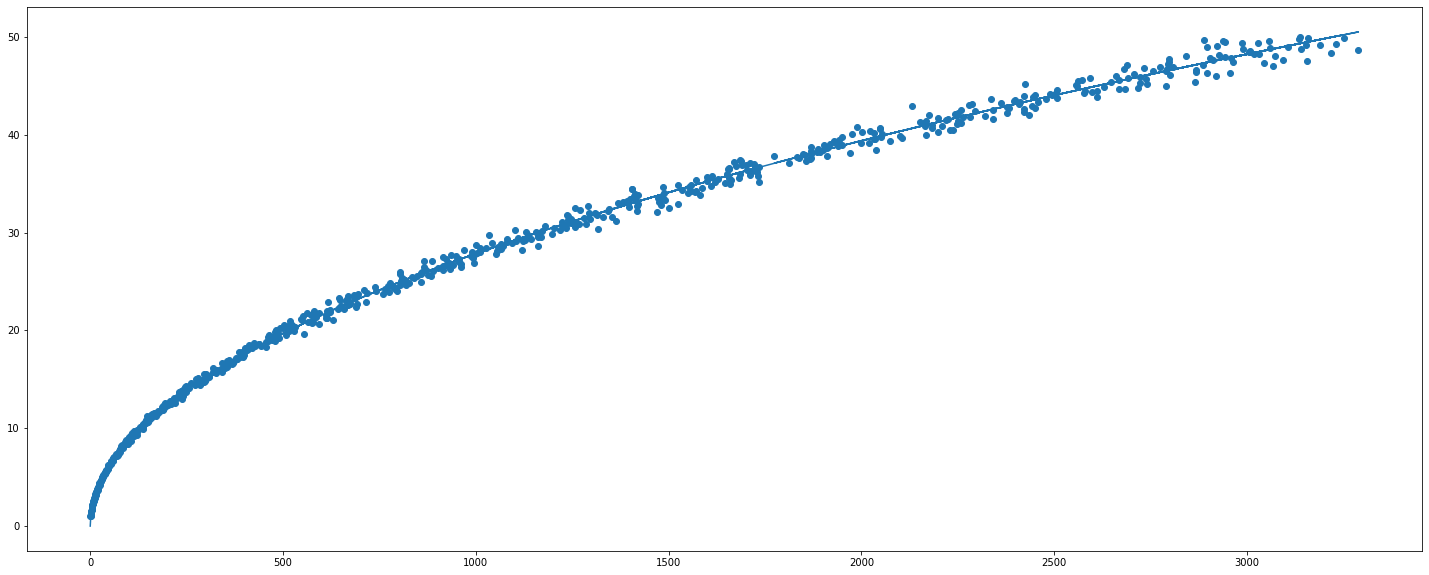

In [ ]:
#Importamos más paquetería
import matplotlib.pyplot as plt
from scipy import optimize

#se procede a estimar el parámetro 'a' manteniendo el valor de 'b' fijo en 1
#Para ello, se crea un vector 'a' que contiene los valores que se utilizarán para generar muestras aleatorias de una distribución coseno con parámetros 'a' y 'b', donde 'b' se mantiene fijo en 1
a=np.linspace(1,50,700)
#Después, se crea un vector vacío del mismo tamaño que el vector 'a', llamado 'v'
v=np.empty(len(a))
#A continuación, se itera sobre cada valor en el vector 'a' y se genera una muestra aleatoria de una distribución coseno con los parámetros 'a' y 'b' correspondientes, 
#y se calcula la varianza de esta muestra. El valor de la varianza se almacena en el vector 'v' para su posterior uso
for i in range(1,len(a)): 
  t=d(a[i],1)
  v[i]=np.var(t)

#Ajustamos una curva a nuestros datos generados por los vectores a y v
def g(x,a): 
  return a*np.sqrt(x) 
alpha,cov = optimize.curve_fit(g, xdata = v, ydata = a)
#Finalmente, se crea una figura con un gráfico de dispersión de los valores de 'v' y 'a', y se traza la curva ajustada sobre ella
fig,ax=plt.subplots(figsize=(25,10))
plt.scatter(v,a)
plt.plot(v,g(v,alpha[0]))
plt.show()


In [ ]:
#Calculamos la varianza de la muestra que se nos proporciona al principio del ejercicio
var=np.var(x)
#Estimamos el parámetro 'a' con el ajuste de curva 
print('La estimación del parámetro a es:',g(var,alpha[0]))

La estimación del parámetro a es: 1.4977606027148438


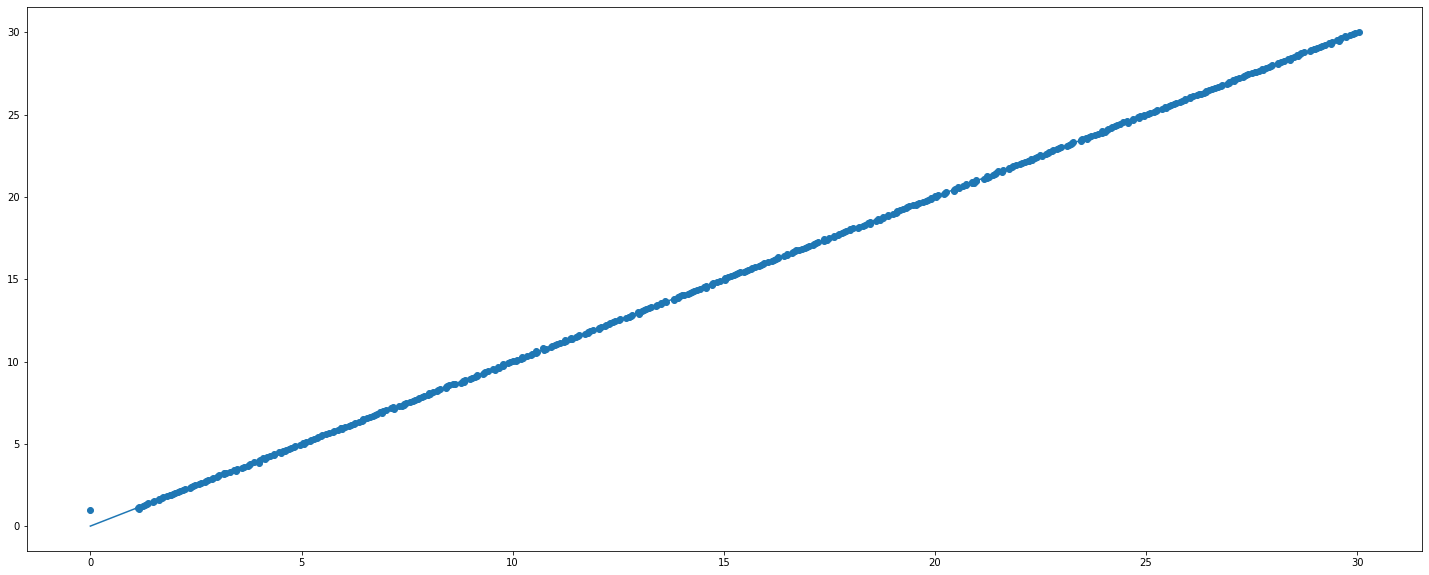

In [ ]:
#Realizamos un procedimiento análogo para estimar el parámetro 'b'
#se procede a estimar el parámetro 'b' manteniendo el valor de 'a' fijo en 1
#Para ello, se crea un vector 'b' que contiene los valores que se utilizarán para generar muestras aleatorias de una distribución coseno con parámetros 'a' y 'b', donde 'a' se mantiene fijo en 1
b=np.linspace(1,30,500)
#Después, se crea un vector vacío del mismo tamaño que el vector 'b', llamado 'm'
m=np.empty(len(b))
#A continuación, se itera sobre cada valor en el vector 'b' y se genera una muestra aleatoria de una distribución coseno con los parámetros 'a' y 'b' correspondientes, 
#y se calcula la media de esta muestra. El valor de la media se almacena en el vector 'm' para su posterior uso
for i in range(1,len(b)): 
  r=d(1,b[i])
  m[i]=np.mean(r)
#Ajustamos una curva a nuestros datos generados por los vectores b y m
def h(x,a,b): 
  return a+b*x
beta,cov = optimize.curve_fit(h, xdata = m, ydata = b)
#Finalmente, se crea una figura con un gráfico de dispersión de los valores de 'm' y 'b', y se traza la curva ajustada sobre ella
fig,ax=plt.subplots(figsize=(25,10))
plt.scatter(m,b)
plt.plot(m,h(m,beta[0],beta[1]))
plt.show()

In [ ]:
#Calculamos la media de la muestra que se nos proporciona al principio del ejercicio
media=np.mean(x)
#Estimamos el parámetro con el ajuste de curva 
print('La estimación del parámetro b es:',h(media,beta[0],beta[1]))


La estimación del parámetro b es: 2.1460650910608505


# Problema 2:

Con la misma secuencia de datos del problema anterior x. I**magína que no conoces la distribución de donde proviene la muestra**. Estima el primer momento de la distribución $\mu=\bar{x}$ (promedio) y enstima el intervalo de confianza del 95%. 

In [ ]:
## Definimos una función que realiza un remuestreo aleatorio con reemplazo de los datos 'data' de tamaño 'len(data)' utilizando la función 'np.random.choice'.
# La función luego aplica 'func' a la muestra resultante y devuelve el resultado.
def bootstrap_remuestreo(data, func):  
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)
#El siguiente código realiza de manera iterattiva lo que explique hace un momento, y los resultados los guardamos en el vector 'be_estimaciones' 
def est_remuestreo(data, func, size=1):
    bs_estimaciones= np.empty(size)
    for i in range(size):
        bs_estimaciones[i] = bootstrap_remuestreo(data,func)
    return bs_estimaciones
#Aplicamos un remuestreo, 10000 veces, a la base de datos 'x' dada al principio del ejercicio, y a cada muestra le calculamos su media
bs_estimaciones = est_remuestreo(x, np.mean, size=10000)
#Calculamos la media al conjunto de medias calculadas por remuestreo para obtener la estimación del primer momento
media_muestral=np.mean(bs_estimaciones)
#Calculamos los percentiles 2.5 y 97.5 al conjunto de medias calculadas por muestreo para obtener la estimación por medio de un intervalo de confianza
conf_int = np.percentile(bs_estimaciones,[2.5, 97.5])
#se imprimen los resultados
print('La estimacion del primer momento es:',media_muestral)
print('El intervalo de confianza del 95% =', conf_int)

La estimacion del primer momento es: 2.13426754505444
El intervalo de confianza del 95% = [1.79475369 2.46365631]


# Problema 3:

Supongamos que deseas analizar la diferencia en las calificaciones obtenidas por tres grupos de estudiantes en un examen de matemáticas. Los grupos son: "Grupo A", "Grupo B" y "Grupo C". Tienes los datos de las calificaciones obtenidas por cada estudiante en un archivo CSV llamado "calificaciones.csv". 

Haz una prueba Anova para ver si hay diferencia en calificaciones de los tres grupos.

In [ ]:
from scipy.stats import f_oneway
#Importamos la base de datos
calificaciones=pd.read_csv('/content/drive/My Drive/Base de datos/calificaciones.csv')
print(calificaciones, '\n')
#Eliminamos la colunma 'Estudiante' (no es útil, y ya es claro que son muestras independientes) 
calificaciones = calificaciones.drop('Estudiante', axis=1)
#Agregamos una nueva columna con los valores del 1 hasta el 6, repiendo lo anterior 3 veces
calificaciones['indice']=np.tile(range(1, 7), 3)
#Transformamos nuestra tabla de datos a formato ancho, donde las columnas representan los distintos tratamientos y las filas sus valores a sus respectivos tratamientos
cali=calificaciones.pivot(index='indice',columns='Grupo',values='Calificación')
print(cali, '\n')
# Realizar el ANOVA
f_statistic, p_value = f_oneway(cali['Grupo A'], cali['Grupo B'],cali['Grupo C'])
# Crear una tabla de resultados
results = pd.DataFrame({'F': [f_statistic], 'p-value': [p_value]})
results.index.name = 'Treatment'
results.columns.name = 'ANOVA'
print(results,'\n') 
print('El estadístico toma un valor de F=4.537127','\n')
print('El valor-p es 0.028777. Si alpha=0.05 podemos concluir que hay una diferencia significativa entre las medias de los tres grupos, ya que el valor alpha es mayor que el valor-p')


      Grupo     Estudiante  Calificación
0   Grupo A   Estudiante 1           8.6
1   Grupo A   Estudiante 2           7.9
2   Grupo A   Estudiante 3           6.5
3   Grupo A   Estudiante 4           9.1
4   Grupo A   Estudiante 5           8.0
5   Grupo A   Estudiante 6           7.2
6   Grupo B   Estudiante 7           6.9
7   Grupo B   Estudiante 8           7.4
8   Grupo B   Estudiante 9           8.2
9   Grupo B  Estudiante 10           7.8
10  Grupo B  Estudiante 11           6.7
11  Grupo B  Estudiante 12           8.3
12  Grupo C  Estudiante 13           9.2
13  Grupo C  Estudiante 14           8.6
14  Grupo C  Estudiante 15           7.7
15  Grupo C  Estudiante 16           8.9
16  Grupo C  Estudiante 17           9.0
17  Grupo C  Estudiante 18           9.5 

Grupo   Grupo A  Grupo B  Grupo C
indice                           
1           8.6      6.9      9.2
2           7.9      7.4      8.6
3           6.5      8.2      7.7
4           9.1      7.8      8.9
5           8.0

In [ ]:
#Comprobación 
#Calculamos el estadistico y el valor p con las fórmulas dadas en clase
from scipy.stats import f
#Calculamos la suma total de cuadrados,la suma total de los tratamientos y la suma total de los errores
CM=pow(calificaciones['Calificación'].sum(),2)/calificaciones['Calificación'].size
Total_SS=calificaciones['Calificación'].apply(lambda x: x**2).sum()-CM
SST=pow(cali['Grupo A'].sum(),2)/cali['Grupo A'].size +pow(cali['Grupo B'].sum(),2)/cali['Grupo B'].size +pow(cali['Grupo C'].sum(),2)/cali['Grupo C'].size-CM
SSE=Total_SS-SST
#Para obtener los cuadrados medios de los tratamientos y del error en un análisis de varianza, se calcula la suma de cuadrados correspondiente y se divide entre los grados de libertad correspondientes
MST=SST/2 
MSE=SSE/15
#Calculamos el estadístico
F=MST/MSE
print('El valor del estadístico es:',F)
#Calculamos el valor p
valor_p=f.sf(F, 2, 15, loc=0, scale=1)
print('El valor p es: ',valor_p)

El valor del estadístico es: 4.537127265640052
El valor p es:  0.028776507471122426


# Problema 4:

Supongamos que tienes dos grupos de datos: "Grupo A" y "Grupo B", y deseas determinar si hay una diferencia significativa entre las medianas de ambos grupos. No sabes si los datos provienene de distribución normal.

a) Has una prueba gráfica y una prueba de hipótsis para saber si los datos tienen una distribución normal para ambos grupos.

b) Emplea estadística no paramétrica para probar si hay diferencia significativa en la mediana entre ambos grupos.

Los datos están en el archivo datos.csv

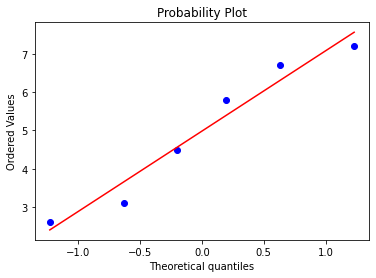

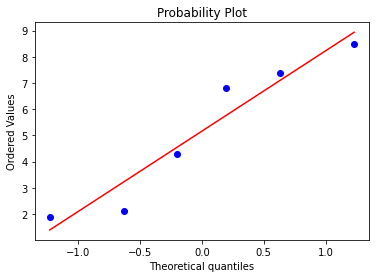

In [ ]:
#Haz una prueba gráfica y una prueba de hipótsis para saber si los datos tienen una distribución normal para ambos grupos.
#Importamos la base de datos
datos=pd.read_csv('/content/drive/My Drive/Base de datos/datos.csv')
GA=datos[datos['Grupo']=='Grupo A']['Datos']
GB=datos[datos['Grupo']=='Grupo B']['Datos']
import pylab 
import scipy.stats as stats

#Realizamos las gráficas cuantil-cuantil para cada grupo
stats.probplot(GA, dist="norm", plot=pylab)
pylab.show()
stats.probplot(GB, dist="norm", plot=pylab)
pylab.show() 
#Observamos que en ambos gráficos, los puntos se alinean en cierta medida con la línea diagonal, lo que sugiere que los datos podrían provenir de una distribución normal


In [ ]:
#Importamos la paquetería 
from scipy.stats import mannwhitneyu
#Agregamos una nueva columna con los valores del 1 hasta el 6, repiendo lo anterior 3 veces
datos['indice']=np.tile(range(1, 7), 2)
#Transformamos nuestra tabla de datos a formato ancho, donde las columnas representan los distintos tratamientos y las filas sus valores a sus respectivos tratamientos
da=datos.pivot(index='indice',columns='Grupo',values='Datos')
print(da, '\n')
# Realizmos la prueba de U Mann Whitney para probar si hay una diferencia significativa entre ambos grupos
U, p = mannwhitneyu(da['Grupo A'],da['Grupo B'],method='exact', alternative='two-sided')
# Crear una tabla de resultados
results = pd.DataFrame({'U': [U], 'p-value': [p]})
results.columns.name = 'U-Mann_whitney'
print(results,'\n') 
print('El estadístico toma un valor de U=17.0','\n')
print('El valor-p es 0.937229. Si alpha=0.05 podemos concluir que NO una hay diferencia significativa entre las medias de los dos grupos, ya que el valor alpha es menor que el valor-p')

Grupo   Grupo A  Grupo B
indice                  
1           5.8      1.9
2           3.1      8.5
3           7.2      4.3
4           2.6      6.8
5           6.7      2.1
6           4.5      7.4 

U-Mann_whitney     U   p-value
0               17.0  0.937229 

El estadístico toma un valor de U=17.0 

El valor-p es 0.937229. Si alpha=0.05 podemos concluir que NO una hay diferencia significativa entre las medias de los dos grupos, ya que el valor alpha es menor que el valor-p
